In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [108]:
data = pd.read_csv('heart.csv')

In [109]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [110]:
target = data.iloc[:,-1].values
data1 = data.iloc[:,:-1].values
#data1 = data.iloc[:,0:1].values


##### Standart scaler

In [111]:
#
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
sc2 = StandardScaler()

In [112]:
data1 = sc1.fit_transform(data1)
target = sc2.fit_transform(target.reshape(-1, 1)).ravel()  # y_train'i 1D hale getiriyoruz


In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(data1,target,test_size=0.33, random_state=0)


### SVR model

In [114]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf')

In [115]:
x_train.shape,y_train.shape

((686, 13), (686,))

In [116]:
svr_reg.fit(x_train,y_train)

SVR()

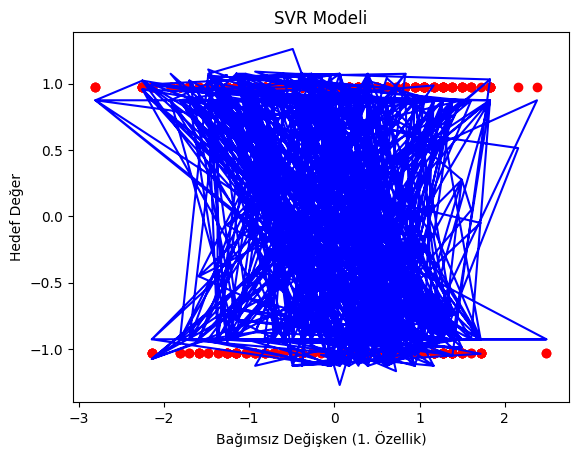

In [117]:
plt.scatter(x_train[:, 0], y_train, color='red')  # İlk özelliği kullanarak scatter çizimi yapın
plt.plot(x_train[:, 0], svr_reg.predict(x_train), color='blue')  # İlk özellik için tahminleri çizin
plt.title('SVR Modeli')
plt.xlabel('Bağımsız Değişken (1. Özellik)')
plt.ylabel('Hedef Değer')
plt.show()


In [118]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = svr_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error: 0.17
R2 Score: 0.83
